In [117]:
pip install xgboost

# Importing Libraries

In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import warnings


# Importing data set from github

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [4]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [5]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [6]:
df.shape

(1000, 40)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [8]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [9]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [10]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

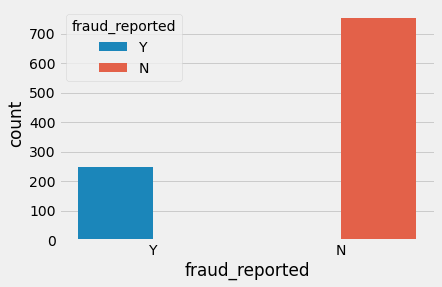

In [11]:
plt.style.use('fivethirtyeight')
ax=sns.countplot(x='fraud_reported', data=df, hue='fraud_reported')

from above plot, like most fraud datasets the label distribution is skewed

In [12]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [13]:
df['incident_state'].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

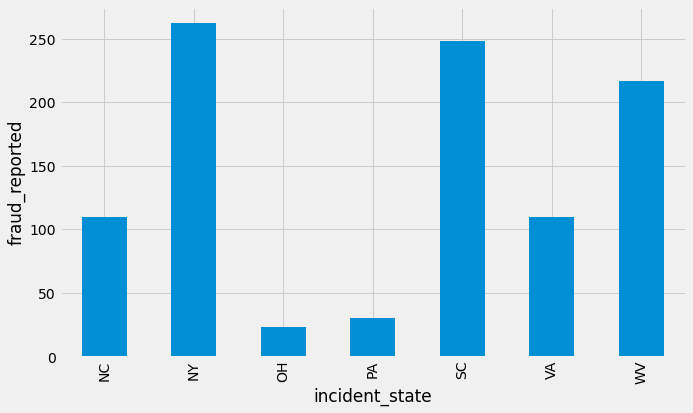

In [14]:
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(10,6))
ax=df.groupby('incident_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('fraud_reported')
plt.show()

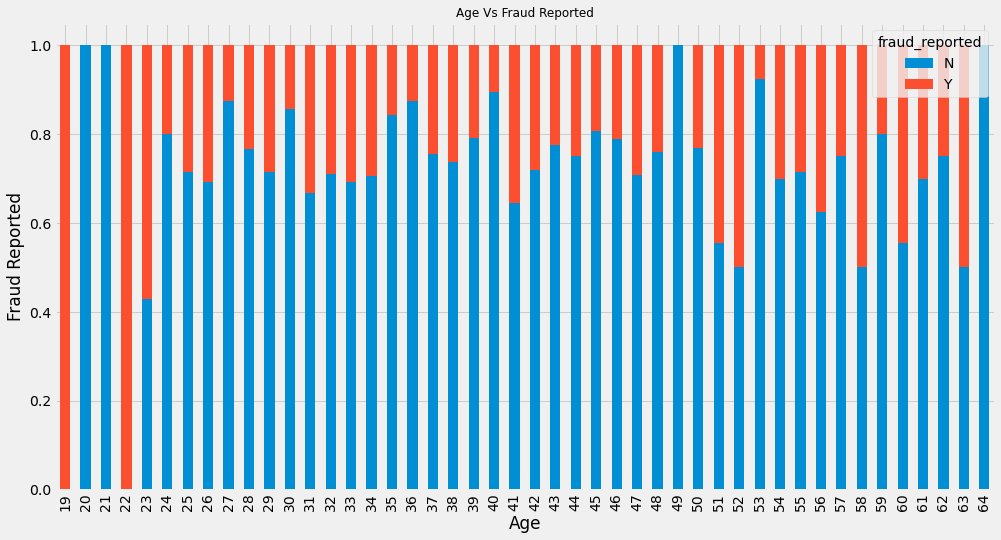

In [18]:
plt.rcParams['figure.figsize']=[15,8]
ax=plt.style.use('fivethirtyeight')
table=pd.crosstab(df.age,df.fraud_reported)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('Age Vs Fraud Reported', fontsize=12)
plt.xlabel('Age')
plt.ylabel('Fraud Reported')
plt.show()

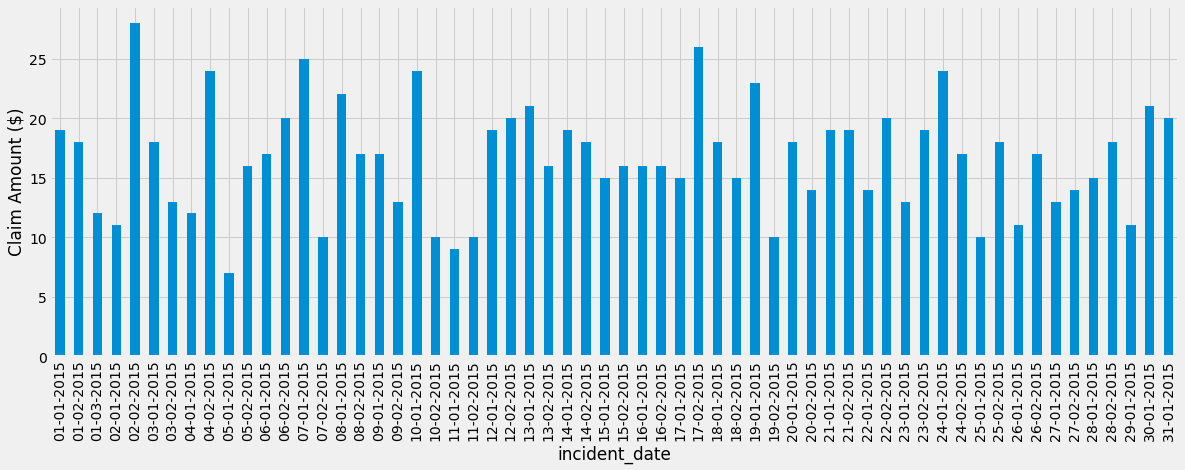

In [19]:
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(18,6))
ax=df.groupby('incident_date').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Claim Amount ($)')
plt.show()

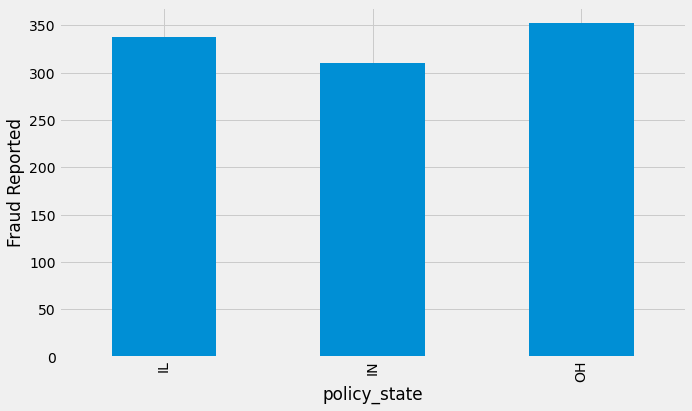

In [21]:
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(10,6))
ax=df.groupby('policy_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud Reported')
plt.show()

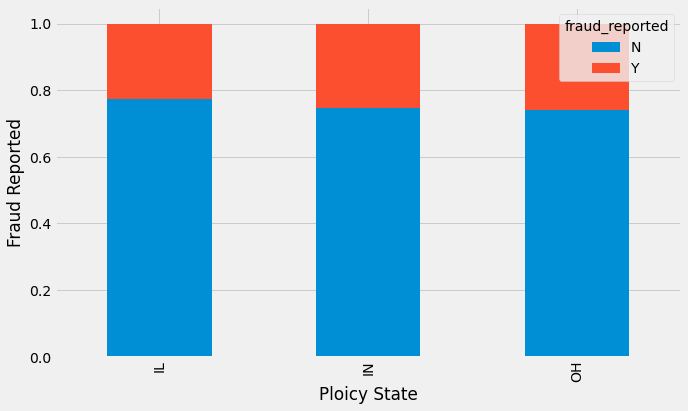

In [24]:
plt.rcParams['figure.figsize']=[10,6]
ax=plt.style.use('fivethirtyeight')
table=pd.crosstab(df.policy_state, df.fraud_reported)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Ploicy State')
plt.ylabel('Fraud Reported')
plt.show()

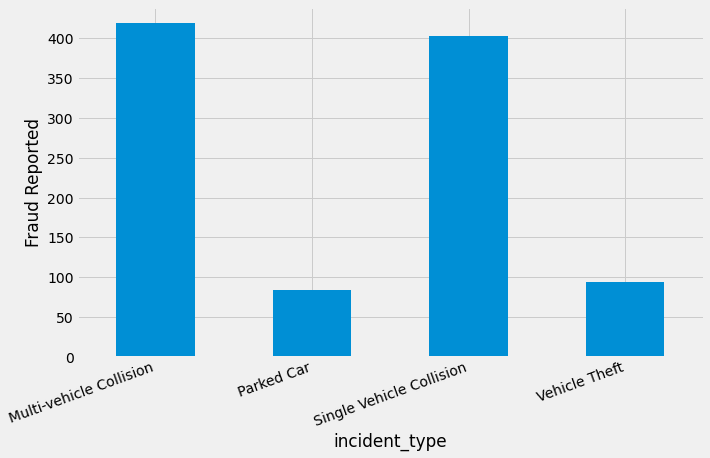

In [25]:
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(10,6))
ax=df.groupby('incident_type').fraud_reported.count().plot.bar(ylim=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20,ha="right")
ax.set_ylabel('Fraud Reported')
plt.show()

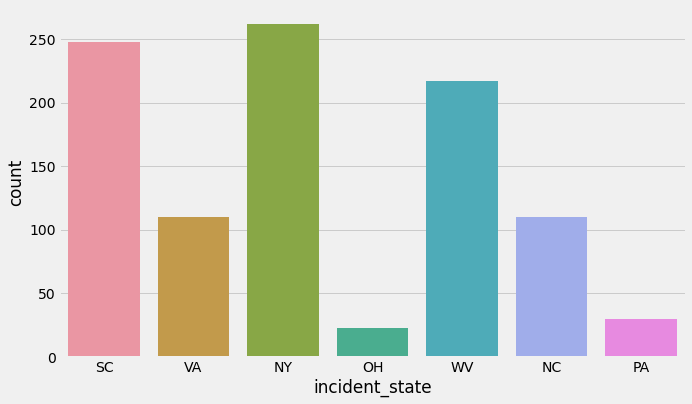

In [26]:
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(10,6))
ax=sns.countplot(x='incident_state', data=df)

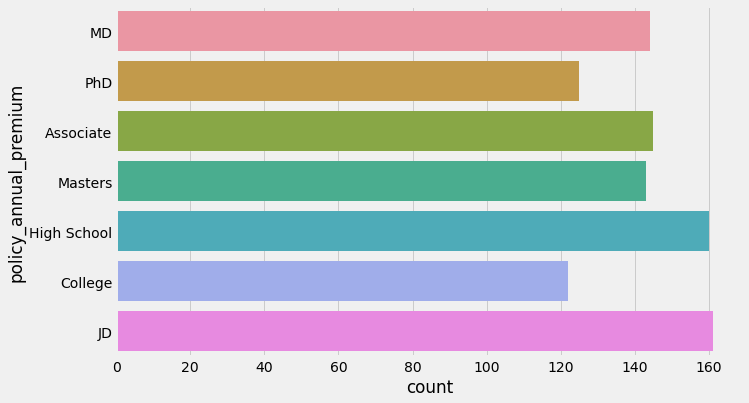

In [27]:
fig=plt.figure(figsize=(10,6))
ax=sns.countplot(y='insured_education_level', data=df)
ax.set_ylabel('policy_annual_premium')
plt.show()

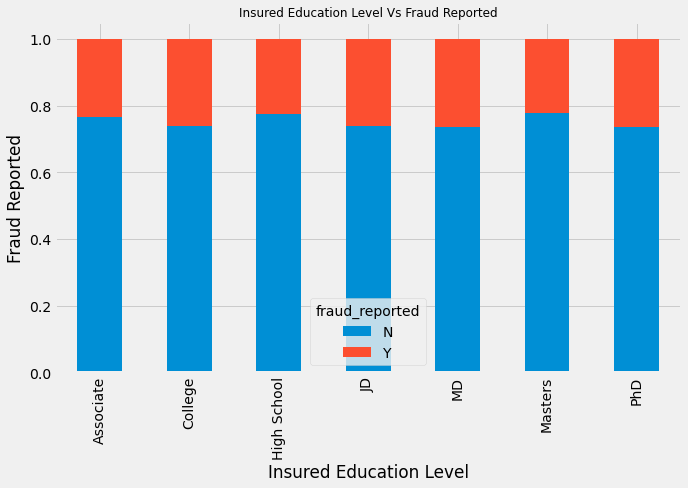

In [28]:
plt.rcParams['figure.figsize']=[10,6]
table=pd.crosstab(df.insured_education_level,df.fraud_reported)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('Insured Education Level Vs Fraud Reported', fontsize=12)
plt.xlabel('Insured Education Level')
plt.ylabel('Fraud Reported')
plt.show()

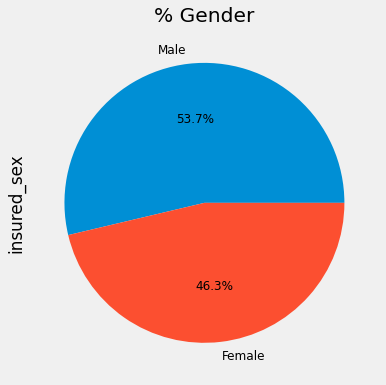

In [30]:
ax=(df['insured_sex'].value_counts()*100.0/len(df)).plot.pie(autopct='%.1f%%', labels=['Male', 'Female'],fontsize=12)
ax.set_title('% Gender')
plt.show()

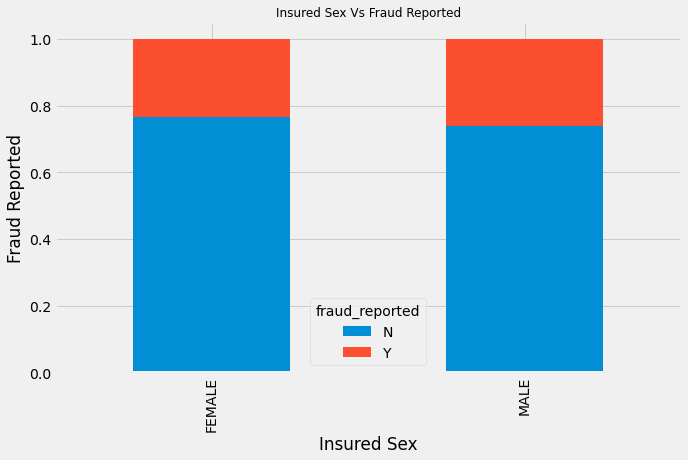

In [31]:
table=pd.crosstab(df.insured_sex,df.fraud_reported)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('Insured Sex Vs Fraud Reported', fontsize=12)
plt.xlabel('Insured Sex')
plt.ylabel('Fraud Reported')
plt.show()

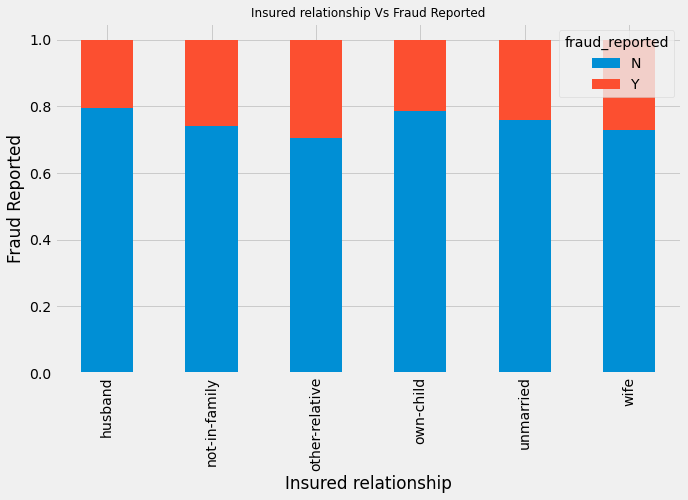

In [34]:
table=pd.crosstab(df.insured_relationship,df.fraud_reported)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('Insured relationship Vs Fraud Reported', fontsize=12)
plt.xlabel('Insured relationship')
plt.ylabel('Fraud Reported')
plt.show()

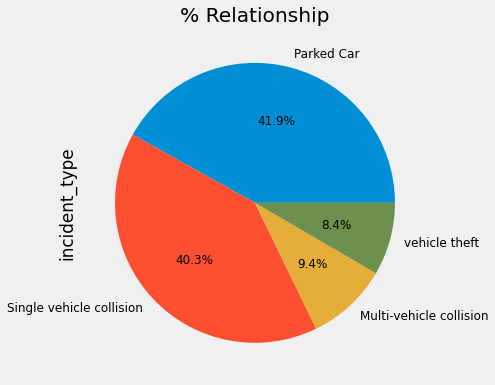

In [35]:
fig=plt.figure(figsize=(10,6))
ax=(df['incident_type'].value_counts()*100.0/len(df)).plot.pie(autopct='%.1f%%', labels=['Parked Car', 'Single vehicle collision', 'Multi-vehicle collision', 'vehicle theft'],fontsize=12)
ax.set_title('% Relationship')
plt.show()

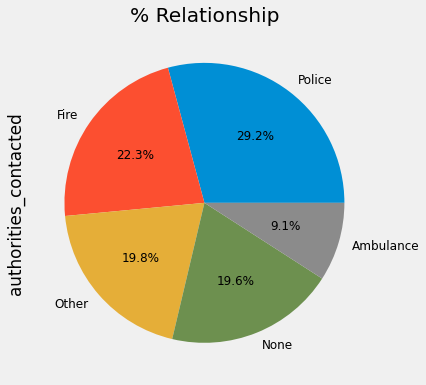

In [36]:
fig=plt.figure(figsize=(10,6))
ax=(df['authorities_contacted'].value_counts()*100.0/len(df)).plot.pie(autopct='%.1f%%', labels=['Police', 'Fire', 'Other', 'None', 'Ambulance'],fontsize=12)
ax.set_title('% Relationship')
plt.show()

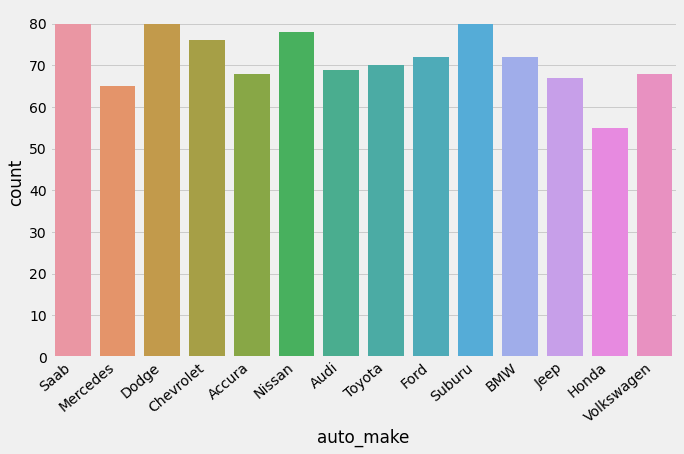

In [38]:
fig=plt.figure(figsize=(10,6))
ax=sns.countplot(x='auto_make', data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha="right")
plt.show()

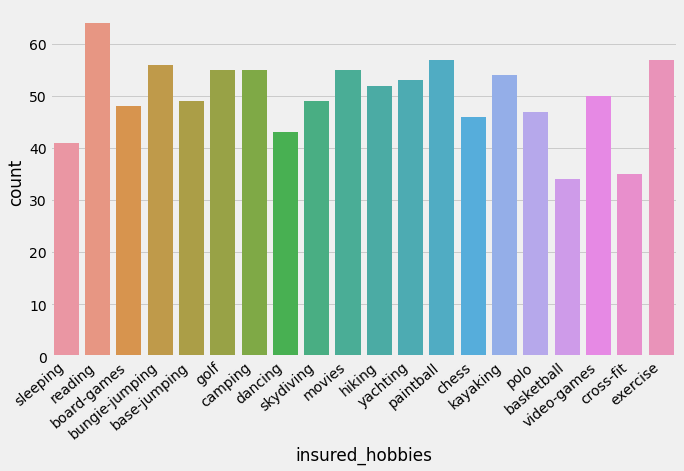

In [39]:
fig=plt.figure(figsize=(10,6))
ax=sns.countplot(x='insured_hobbies', data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha="right")
plt.show()

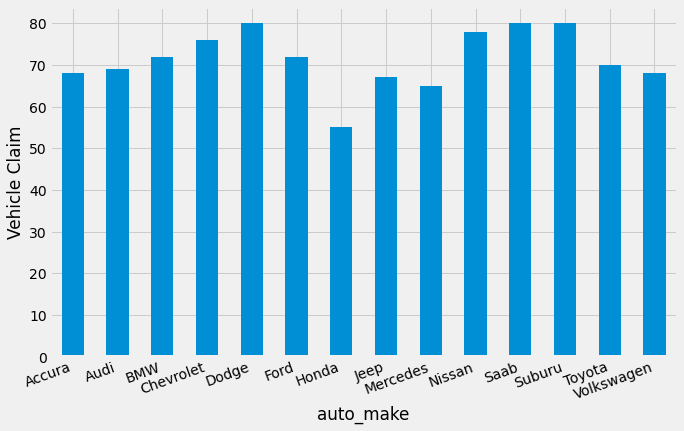

In [42]:
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(10,6))
ax=df.groupby('auto_make').vehicle_claim.count().plot.bar(ylim=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20,ha="right")
ax.set_ylabel('Vehicle Claim')
plt.show()

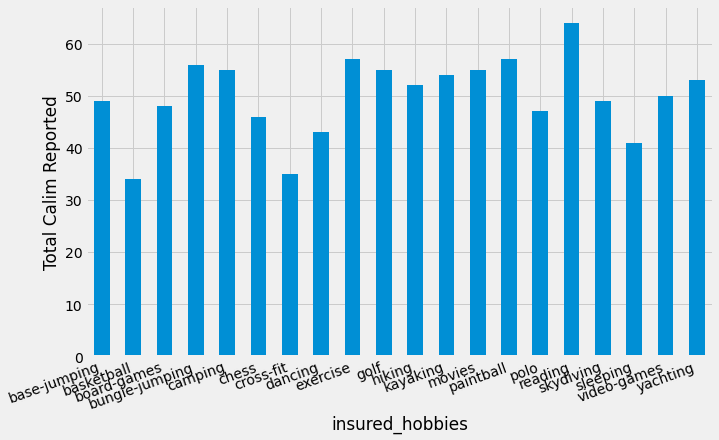

In [46]:
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(10,6))
ax=df.groupby('insured_hobbies').total_claim_amount.count().plot.bar(ylim=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20,ha="right")
ax.set_ylabel('Total Calim Reported')
plt.show()

# Data Processing

In [128]:
df['fraud_reported'].replace(to_replace='Y', value=1, inplace=True)
df['fraud_reported'].replace(to_replace='N', value=1, inplace=True)
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,vehicle_age,incident_period_of_day
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,YES,71610,6510,13020,52080,Saab,92x,1,14,early_morning
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,?,5070,780,780,3510,Mercedes,E400,1,11,morning
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,NO,34650,7700,3850,23100,Dodge,RAM,1,11,morning
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,1,4,early_morning
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,NO,6500,1300,650,4550,Accura,RSX,1,9,evening


In [48]:
df[['insured_zip']]=df[['insured_zip']].astype(object)

In [49]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,1.0,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,0.0,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,1.0,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,1.0,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,1.0,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,1.0,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,1.0,NaN


some variables lie policy_bind_data, incident_date, incident_location, insured_zip contain very high number of level. we will remove these columns for further process.

In [50]:
df.auto_year.value_counts()

1995    56
1999    55
2005    54
2006    53
2011    53
2007    52
2003    51
2010    50
2009    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64

auto_year has 21 levels and the no of records for each of the levels are quite significant considering datasize is not so large. we will do some featureengineering using this variable considering, the year of manufacturing of automobile indicates the age of the vehicle and may contain information for insurance premium or fraud is concerened.

In [51]:
df['vehicle_age']=2018 - df['auto_year']
df['vehicle_age'].head()

0    14
1    11
2    11
3     4
4     9
Name: vehicle_age, dtype: int64

In [52]:
bins=[-1,3,6,9,12,17,20,24]
names=["past_midnight", "early_morning", "morning", "fore-noon", "afternoon", "evening", "night"]
df['incident_period_of_day']=pd.cut(df.incident_hour_of_the_day, bins, labels=names).astype(object)
df[['incident_hour_of_the_day', 'incident_period_of_day']].head(20)

,incident_hour_of_the_day,incident_period_of_day
0,5,early_morning
1,8,morning
2,7,morning
3,5,early_morning
4,20,evening
5,19,evening
6,0,past_midnight
7,23,night
8,21,night
9,14,afternoon


In [53]:
df.select_dtypes(include=['object']).columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_zip',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'incident_date',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'property_damage', 'police_report_available',
       'auto_make', 'auto_model', 'incident_period_of_day'],
      dtype='object')

In [59]:
unknowns={}
for i in list(df.columns):
    if(df[i]).dtype==object:
        j=np.sum(df[i]=="?")
        unknowns[i]=j
unknowns=pd.DataFrame.from_dict(unknowns, orient='index')
print(unknowns)

                           0
policy_state               0
policy_csl                 0
insured_sex                0
insured_education_level    0
insured_occupation         0
insured_hobbies            0
insured_relationship       0
incident_type              0
collision_type           178
incident_severity          0
authorities_contacted      0
incident_state             0
incident_city              0
property_damage          360
police_report_available  343
auto_make                  0
auto_model                 0
incident_period_of_day     0


collision_type, property_damage,police_report_available contain many missing values. so, first isolate these variables, inspect these individually for spread of catagory values.

In [60]:
df.collision_type.value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

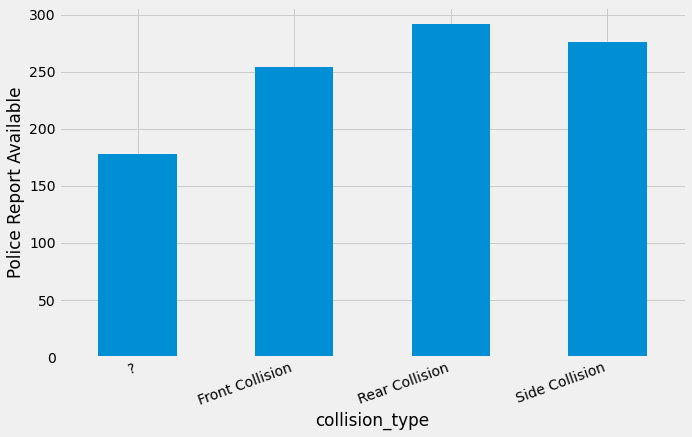

In [63]:
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(10,6))
ax=df.groupby('collision_type').police_report_available.count().plot.bar(ylim=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20,ha="right")
ax.set_ylabel('Police Report Available')
plt.show()

In [64]:
df.property_damage.value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

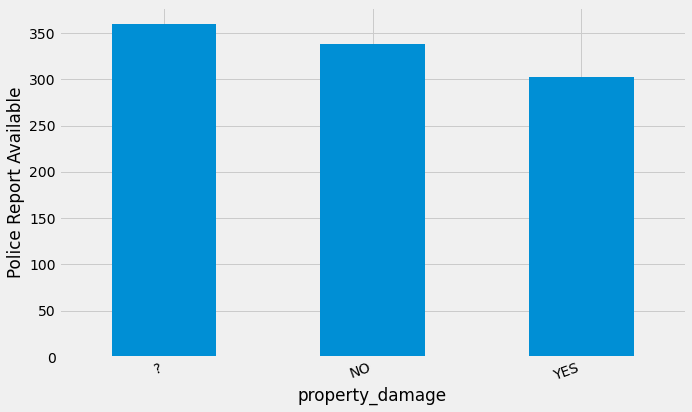

In [65]:
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(10,6))
ax=df.groupby('property_damage').police_report_available.count().plot.bar(ylim=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20,ha="right")
ax.set_ylabel('Police Report Available')
plt.show()

In [66]:
df.police_report_available.value_counts()

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64

In [68]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'fraud_reported', 'vehicle_age',
       'incident_period_of_day'],
      dtype='object')

In [69]:
df._get_numeric_data().head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported,vehicle_age
0,328,48,1000,1406.91,0,53300,0,1,1,2,71610,6510,13020,52080,1,14
1,228,42,2000,1197.22,5000000,0,0,1,0,0,5070,780,780,3510,1,11
2,134,29,2000,1413.14,5000000,35100,0,3,2,3,34650,7700,3850,23100,1,11
3,256,41,2000,1415.74,6000000,48900,-62400,1,1,2,63400,6340,6340,50720,1,4
4,228,44,1000,1583.91,6000000,66000,-46000,1,0,1,6500,1300,650,4550,1,9


In [70]:
df._get_numeric_data().columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'number_of_vehicles_involved', 'bodily_injuries',
       'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim', 'fraud_reported', 'vehicle_age'],
      dtype='object')

In [71]:
df.select_dtypes(include=['object']).columns

Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'incident_period_of_day'],
      dtype='object')

# Applying one-hot encoding to convert all categorical variables except out target variables

In [77]:
dummies=pd.get_dummies(df[[
    'policy_state',
    'policy_csl',
    'insured_sex',
    'insured_education_level',
    'insured_occupation',
    'insured_hobbies',
    'insured_relationship',
    'incident_type',
    'incident_severity',
    'authorities_contacted',
    'incident_state',
    'incident_city',
    'auto_make',
    'auto_model',
    'incident_period_of_day']])


In [78]:

dummies=dummies.join(df[[
    'collision_type',
    'property_damage',
    'police_report_available',
    'fraud_reported']])

dummies.head()

,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,...,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight,collision_type,property_damage,police_report_available,fraud_reported
0,0,0,1,0,1,0,0,1,0,0,...,1,0,0,0,0,0,Side Collision,YES,YES,1
1,0,1,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,?,?,?,1
2,0,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,0,Rear Collision,NO,NO,1
3,1,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,Front Collision,?,NO,1
4,1,0,0,0,0,1,0,1,1,0,...,0,1,0,0,0,0,?,NO,NO,1


In [79]:
x=dummies.iloc[:,0:-1]
y=dummies.iloc[:,-1]

In [80]:
len(x.columns)

145

In [81]:
x.head(2)

,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,...,incident_period_of_day_afternoon,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight,collision_type,property_damage,police_report_available
0,0,0,1,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,Side Collision,YES,YES
1,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,?,?,?


In [82]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: fraud_reported, dtype: int64

In [83]:
from sklearn.preprocessing import LabelEncoder
x['collision_en']=LabelEncoder().fit_transform(dummies['collision_type'])
x[['collision_type', 'collision_en']]

,collision_type,collision_en
0,Side Collision,3
1,?,0
2,Rear Collision,2
3,Front Collision,1
4,?,0
...,...,...
995,Front Collision,1
996,Rear Collision,2
997,Side Collision,3
998,Rear Collision,2


In [84]:
x['property_damage'].replace(to_replace='YES', value=1, inplace=True)
x['property_damage'].replace(to_replace='NO', value=0, inplace=True)
x['property_damage'].replace(to_replace='?', value=0, inplace=True)
x['police_report_available'].replace(to_replace='YES', value=1, inplace=True)
x['police_report_available'].replace(to_replace='NO', value=0, inplace=True)
x['police_report_available'].replace(to_replace='?', value=0, inplace=True)

x.head(10)

,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,...,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight,collision_type,property_damage,police_report_available,collision_en
0,0,0,1,0,1,0,0,1,0,0,...,1,0,0,0,0,0,Side Collision,1,1,3
1,0,1,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,?,0,0,0
2,0,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,0,Rear Collision,0,0,2
3,1,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,Front Collision,0,0,1
4,1,0,0,0,0,1,0,1,1,0,...,0,1,0,0,0,0,?,0,0,0
5,0,0,1,0,1,0,1,0,0,0,...,0,1,0,0,0,0,Rear Collision,0,0,2
6,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,Front Collision,0,0,1
7,1,0,0,1,0,0,0,1,1,0,...,0,0,0,0,1,0,Front Collision,0,1,1
8,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,Front Collision,0,1,1
9,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,Rear Collision,0,0,2


In [85]:
x=x.drop(columns=['collision_type'])
x.head(2)

,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,...,incident_period_of_day_afternoon,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight,property_damage,police_report_available,collision_en
0,0,0,1,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,1,3
1,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [86]:
x=pd.concat([x,df._get_numeric_data()], axis=1)
x.head(2)

,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,...,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported,vehicle_age
0,0,0,1,0,1,0,0,1,0,0,...,0,1,1,2,71610,6510,13020,52080,1,14
1,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,5070,780,780,3510,1,11


In [87]:
x.columns

Index(['policy_state_IL', 'policy_state_IN', 'policy_state_OH',
       'policy_csl_100/300', 'policy_csl_250/500', 'policy_csl_500/1000',
       'insured_sex_FEMALE', 'insured_sex_MALE',
       'insured_education_level_Associate', 'insured_education_level_College',
       ...
       'capital-loss', 'number_of_vehicles_involved', 'bodily_injuries',
       'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim', 'fraud_reported', 'vehicle_age'],
      dtype='object', length=161)

In [88]:
x=x.drop(columns=['fraud_reported'])
x.columns

Index(['policy_state_IL', 'policy_state_IN', 'policy_state_OH',
       'policy_csl_100/300', 'policy_csl_250/500', 'policy_csl_500/1000',
       'insured_sex_FEMALE', 'insured_sex_MALE',
       'insured_education_level_Associate', 'insured_education_level_College',
       ...
       'capital-gains', 'capital-loss', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'vehicle_age'],
      dtype='object', length=160)

In [92]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

model=LinearDiscriminantAnalysis()
kfold=KFold(n_splits=5)
result=cross_val_score(model,x,y,cv=kfold, scoring='accuracy')
print(result.mean())

C:\Users\welcome\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:480: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ratio_ = (S**2 / np.sum(
C:\Users\welcome\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:480: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ratio_ = (S**2 / np.sum(
C:\Users\welcome\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:480: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ratio_ = (S**2 / np.sum(
C:\Users\welcome\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:480: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ratio_ = (S**2 / np.sum(
C:\Users\welcome\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:480: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ratio_ = (S**2 / np.sum(


1.0


In [96]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8, random_state=1234)
print('length of x_train and x_test:', len(x_train),len(x_test))
print('length of y_train and y_test:', len(y_train),len(y_test))

length of x_train and x_test: 800 200
length of y_train and y_test: 800 200


In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,recall_score,classification_report,cohen_kappa_score
from sklearn import metrics

rfc=RandomForestClassifier(criterion='gini', n_estimators=1000, verbose=1, n_jobs=-1, class_weight='balanced', max_features='auto')
rfcg=rfc.fit(x_train,y_train)
predictions=rfcg.predict(x_test)
print('Baseline: N_features: ', len(list(x.columns)))
print('Baseline: Accuracy: ' ,round(accuracy_score(y_test,predictions)*100,2))
print('Cohen Kappa: '+str(np.round(cohen_kappa_score(y_test,predictions)*1002)))
print('Baseline: Recall: ', round(recall_score(y_test,predictions)*100,2))
print('\n Classification Report:\n', classification_report(y_test,predictions))                                 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    3.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.3s


Baseline: N_features:  160
Baseline: Accuracy:  100.0
Cohen Kappa: nan
Baseline: Recall:  100.0

 Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       200

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.3s finished
C:\Users\welcome\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:638: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


In [104]:
rfcg

RandomForestClassifier(class_weight='balanced', n_estimators=1000, n_jobs=-1,
                       verbose=1)

Confusion matrix:
[[200]]


<Figure size 720x432 with 0 Axes>

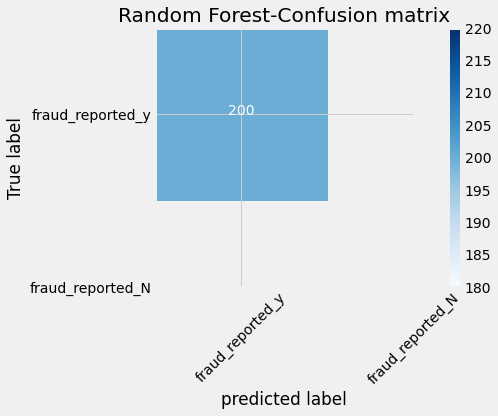

In [111]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm,classes,title='Confusion matrix', normalize=False, cmap=plt.cm.Blues):
    print('Confusion matrix:')
    
    print(cm)
    
    fig=plt.figure(figsize=(10,6))
    plt.style.use('fivethirtyeight')
    plt.imshow(cm ,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    
    fmt='.2f' if normalize else 'd'
    thresh=cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),horizontalalignment='center', color='white' if cm[i,j]> thresh else 'black')
        
        plt.ylabel('True label')
        plt.xlabel('predicted label')
        plt.tight_layout()
        
cnf_matrix=confusion_matrix(y_test, predictions)
np.set_printoptions(precision=2)
        
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['fraud_reported_y','fraud_reported_N'], title='Random Forest-Confusion matrix')

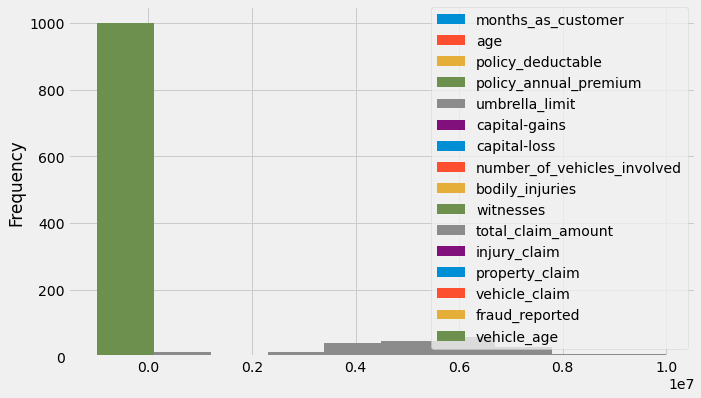

In [112]:
df.plot(kind='hist')
plt.show()

In [113]:
print('Minimum Premium ' +str(df['policy_annual_premium'].min()))
print('Maximum Premium ' +str(df['policy_annual_premium'].max()))

Minimum Premium 433.33
Maximum Premium 2047.59


In [114]:
print('Vehicle age-minimum '+ str(df['vehicle_age'].min()))
print('Vehicle age-maximum '+ str(df['vehicle_age'].max()))

Vehicle age-minimum 3
Vehicle age-maximum 23


In [115]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler(with_mean=False)
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [127]:
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

xgb=XGBClassifier()
logreg2=LogisticRegressionCV(solver='lbfgs', cv=10)
knn=KNeighborsClassifier(5)
svc1=SVC()
abd=AdaBoostClassifier()
dtclf=DecisionTreeClassifier(max_depth=5)
rfclf=RandomForestClassifier()

seed=7
models=[]
models.append(('LR', LogisticRegressionCV(solver='lbfgs',max_iter=5000,cv=10)))
models.append(('XGB', XGBClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RF', RandomForestClassifier(n_estimators=100)))
models.append(('ADA', AdaBoostClassifier(n_estimators=100)))

results=[]
names=[]
scoring='accuracy'
for name,model in models:
    kfold=model_selection.KFold(n_splits=10)
    cv_results=model_selection.cross_val_score(model,x_train_scaled,y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s : %f (%f)" %  (name,cv_results.mean(),cv_results.std())
    print(msg)



C:\Users\welcome\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\welcome\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\welcome\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1853, in fit
    raise ValueError("This solver needs samples of at least 2 classes"
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\welcome\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Deta

LR : nan (nan)
XGB : nan (nan)
KNN : 1.000000 (0.000000)
DT : 1.000000 (0.000000)
SVM : nan (nan)


C:\Users\welcome\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\welcome\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\welcome\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\welcome\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 558, in _validate_targets
    raise ValueError(
ValueError: The number of classes has to be greater than one; got 1 class

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\welcome\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for th

RF : 1.000000 (0.000000)
ADA : 1.000000 (0.000000)


In [ ]:
LR : nan (nan)
XGB : nan (nan)
KNN : 1.000000 (0.000000)
DT : 1.000000 (0.000000)
SVM : nan (nan)
RF : 1.000000 (0.000000)
ADA : 1.000000 (0.000000)